<a href="https://colab.research.google.com/github/hailzno/Machine-Learning/blob/main/Firewall%20Classification%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Firewall_Rule_Classification.csv to Firewall_Rule_Classification.csv


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Firewall_Rule_Classification.csv')
print(data.head())

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        33313               443            29395                   443   
1        53871               443            15841                   443   
2        56628               443            13354                   443   
3        50270               445                0                     0   
4        64113                53            33491                    53   

   Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  pkts_sent  \
0   9675        2389            7286       43                 143         21   
1   7797        1807            5990       15                 135          7   
2   8240        3521            4719       25                  18         15   
3     70          70               0        1                   0          1   
4    294         134             160        2                  30          1   

   pkts_received  Class  
0             22  allow  
1              8

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Check the encoded classes
print(data['Class'].value_counts())

Class
0    150314
1     60053
2     51539
3       222
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Decision Tree Accuracy: 0.9995231373745851
Random Forest Accuracy: 0.9995422118796017
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29996
           1       1.00      1.00      1.00     12042
           2       1.00      1.00      1.00     10342
           3       1.00      0.98      0.99        46

    accuracy                           1.00     52426
   macro avg       1.00      0.99      1.00     52426
weighted avg       1.00      1.00      1.00     52426

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29996
           1       1.00      1.00      1.00     12042
           2       1.00      1.00      1.00     10342
           3       1.00      0.98      0.99        46

    accuracy                           1.00     52426
   macro avg       1.00      0.99      1.00     52426
weighted avg       1.00

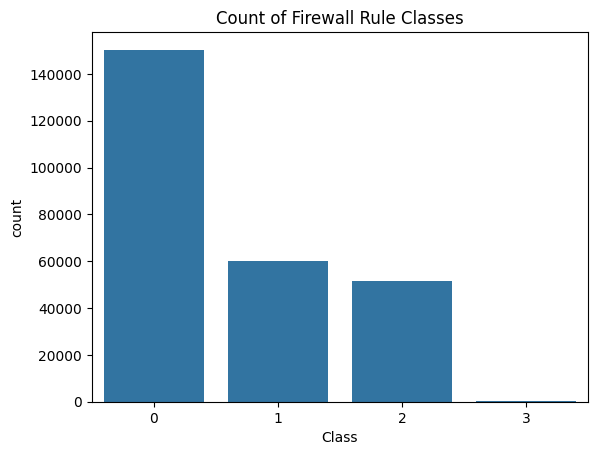

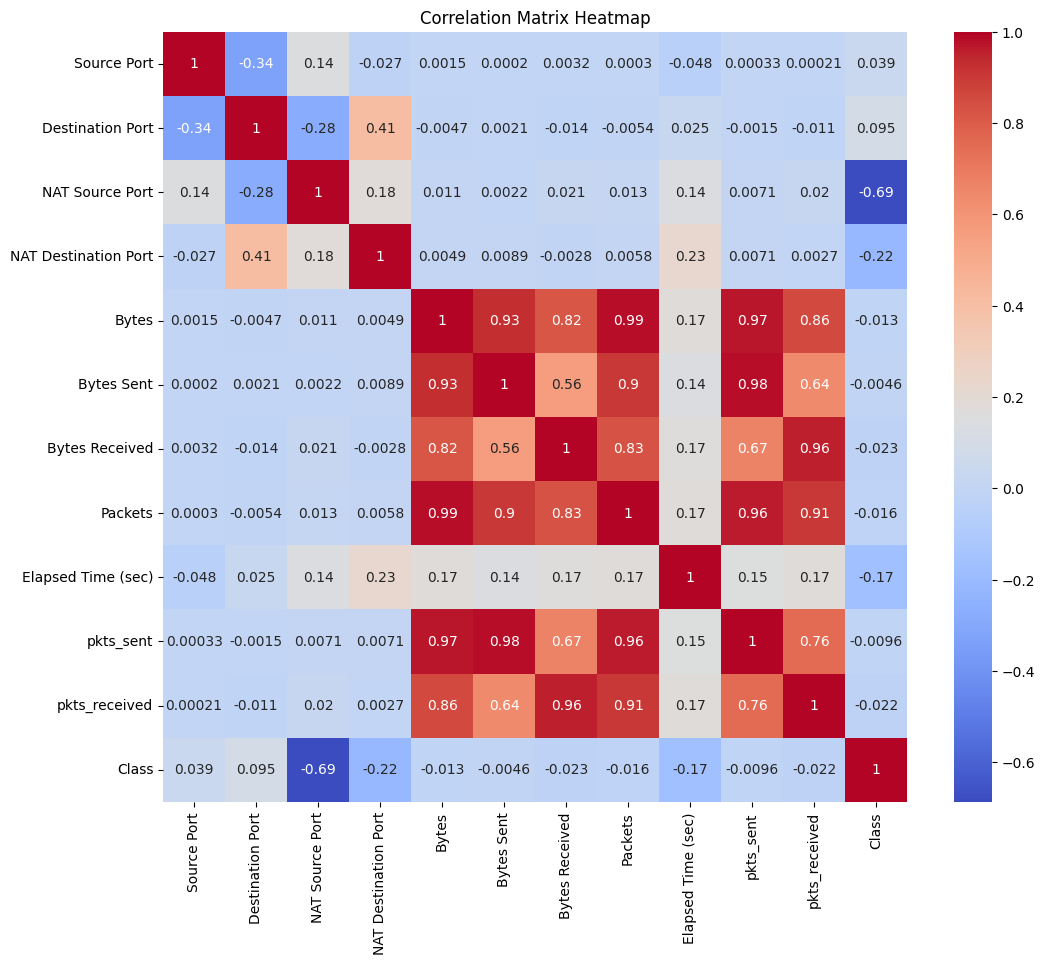

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for class distribution
sns.countplot(x='Class', data=data)
plt.title('Count of Firewall Rule Classes')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

1) Objective:
• State the main objective of the machine learning model in this scenario.
• Why is automating the classification of firewall rules using machine learning
beneficial?

2) Dataset:
• Provide a brief overview of the dataset, including the features it contains.
• Explain the use of LabelEncoder in preprocessing the data.

3) Models Explored:
• Use machine learning models Decision Trees, and Random Forest (You can try K
Nearest Neighbors, Naïve Bayes, and Gradient Boosting as well but Decision tree and
Random forest are required).

4) Results and Analysis:
• Provide a summary of the results obtained from each classifier model.

5) Code Implementation:
• Include relevant portions of the Python code used for data preprocessing, model
training, and evaluation.
• Explain the steps involved in training and evaluating each model.

6) Visualization:
• Include visualizations such as count plots for class distribution and a correlation
matrix heatmap.
• Discuss the importance of these visualizations in understanding the dataset.

7) Conclusion:
• Summarize the key findings and the most effective model for this firewall rule
classification task.
• Discuss any insights gained from the analysis and results.

8) Further Exploration:
• Suggest potential avenues for further exploration or improvement in the model.
• Are there additional features or techniques that could enhance the model's
performance?

1) The main objective of the machine learning model here is to accurately classify firewall rules into different categories, Allow, Drop, and Deny based on the given features.

Benefits of Automating Firewall Rule Classification:

Automating the classification process using machine learning can significantly improve efficiency and reduce the manual effort required to manage firewall rules.
It can help identify patterns and anomalies in firewall rule behavior, enabling better security monitoring and decision-making.
Automated classification can ensure consistent and accurate categorization of firewall rules, reducing the risk of human errors.
The machine learning model can be used to predict the classification of new or modified firewall rules, enabling proactive management of the firewall system.

2) The dataset contains various features related to firewall rules, including:

Source and destination ports
Bytes of data transferred
Number of packets transferred
Time elapsed
NAT ports
Use of LabelEncoder:
The LabelEncoder is used to convert the categorical "Class" feature, which represents the firewall rule classification (Allow, Drop, Deny), into numerical values that can be understood by the machine learning algorithms.

3) Machine Learning Models:

Decision Trees

Random Forest

Both models were trained and evaluated on the dataset to classify firewall rules accurately.

4) Summary of Results:

Decision Tree: Achieved an accuracy of 0.9995. Precision, recall, and F1-score were excellent across all firewall rule classes.
Random Forest: Also achieved an accuracy of 0.9995, with similarly high precision, recall, and F1-score across all classes.
Both models demonstrated excellent precision, recall, and F1-score across all the firewall rule classes.

5) Data Preprocessing:

Loaded the dataset
Handled missing values

Encoded the "Class" feature using LabelEncoder


Model Training and Evaluation:

Split the data into training and testing sets

Trained the Decision Tree and Random Forest models

Evaluated the models using accuracy, precision, recall, and F1-score

6)
Visualizations Used:

Class Distribution Plot:

A bar chart showing the distribution of firewall rule classes.

Results: Class 0 had the highest count (150,314), followed by Class 1 (60,053), Class 2 (51,539), and Class 3 (222).

Correlation Matrix Heatmap:

A heatmap displaying the correlation coefficients between features.

Results: Strong correlations were seen, such as between "Bytes" and "Packets" (0.99), and "pkts_sent" and "pkts_received" (0.91).

Importance of Visualizations:

Class Distribution Plot: Helps understand the dataset's class imbalance, which can influence model evaluation and performance.

Correlation Matrix Heatmap: Provides insights into feature relationships, guiding feature selection and improving model interpretability.

7)
Both the Decision Tree and Random Forest models achieved near-perfect classification performance with an accuracy of 0.9995.
The models demonstrated excellent precision, recall, and F1-score across all firewall rule classes.

Most Effective Model:

Both models performed equally well, but Random Forest may be preferred for its robustness and ability to handle overfitting better than Decision Trees.

8)
Potential Avenues for Improvement:

Additional Features: Incorporate features like network traffic patterns, user behavior, or external threat intelligence to enhance the model's predictive capabilities.

Handling Class Imbalance: Explore techniques like oversampling, undersampling, or class weighting to address the imbalance in class distribution.

Advanced Techniques: Investigate ensemble methods, deep learning, or transfer learning to further improve classification accuracy.

Real-World Deployment: Assess feasibility of deploying the model in a real-world firewall system, focusing on interpretability and integration challenges.